# Title : Time Series Forecasting

In [1]:
# NAME : RHUTUJA VISHWANATH PATI
# ROLL NO.: 2337030
# SEAT NO.: T190352076
# BATCH : B

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('gold_monthly_csv.csv')

In [10]:
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [11]:
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [12]:
df.shape

(847, 2)

In [13]:
print(f"Date range of gold prices available from - {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df)-1]}")

Date range of gold prices available from - 1950-01 to 2020-07


In [14]:
date = pd.date_range(start= '1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [15]:
df['month']=date
df.drop('Date', axis=1 ,inplace=True)
df=df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


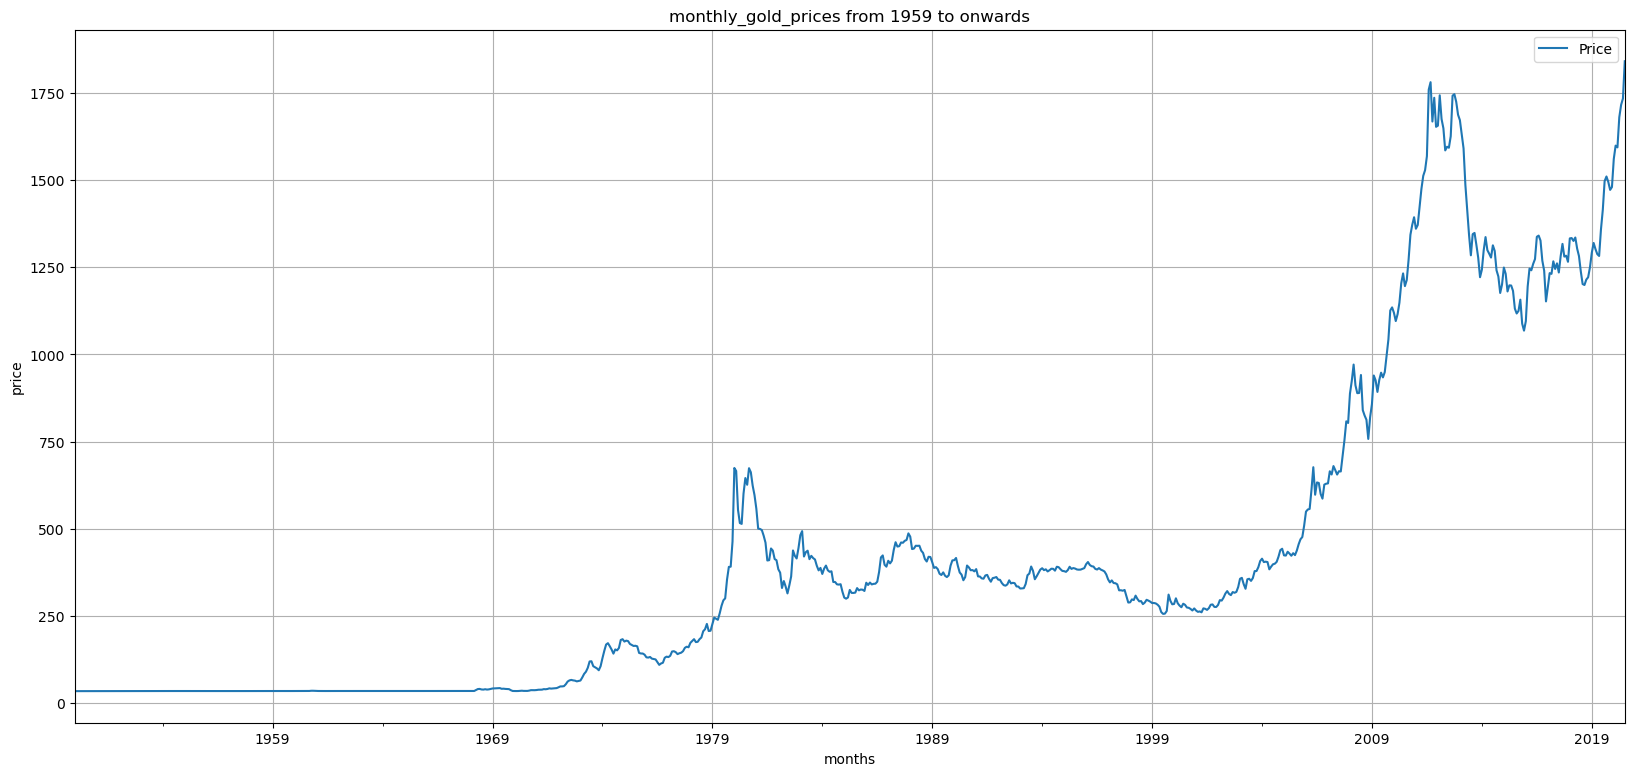

In [16]:
df.plot(figsize=(20,9))
plt.title('monthly_gold_prices from 1959 to onwards')
plt.xlabel('months')
plt.ylabel('price')
plt.grid()

In [17]:

round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


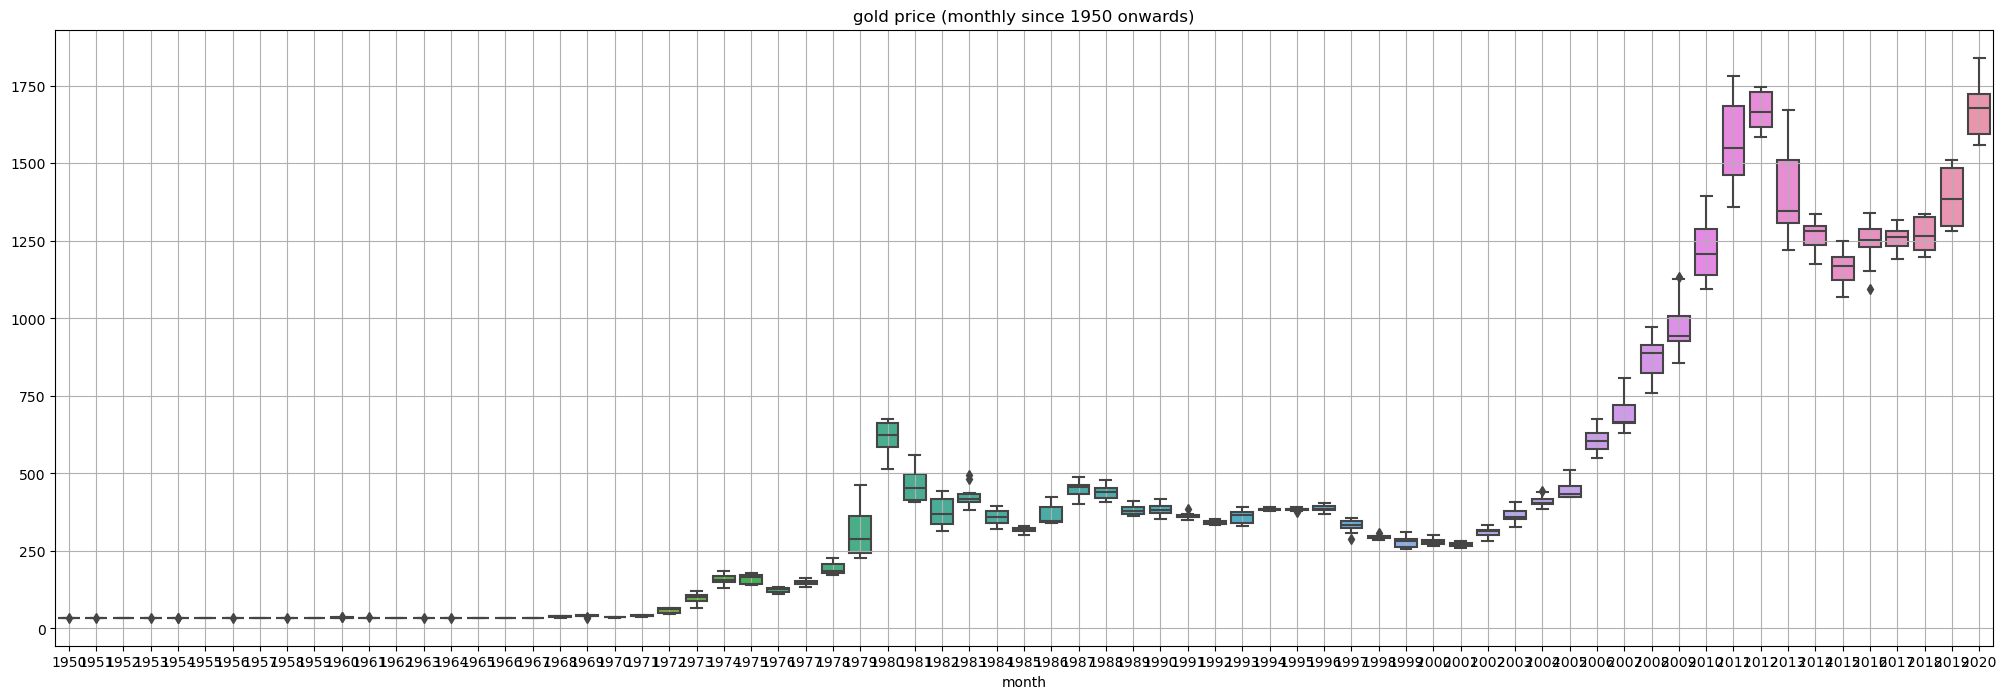

In [18]:
_,ax= plt.subplots (figsize=(25,8))
sns.boxplot(x =df.index.year, y= df.values[:,0], ax=ax)
plt.title('gold price (monthly since 1950 onwards)')
plt.grid()

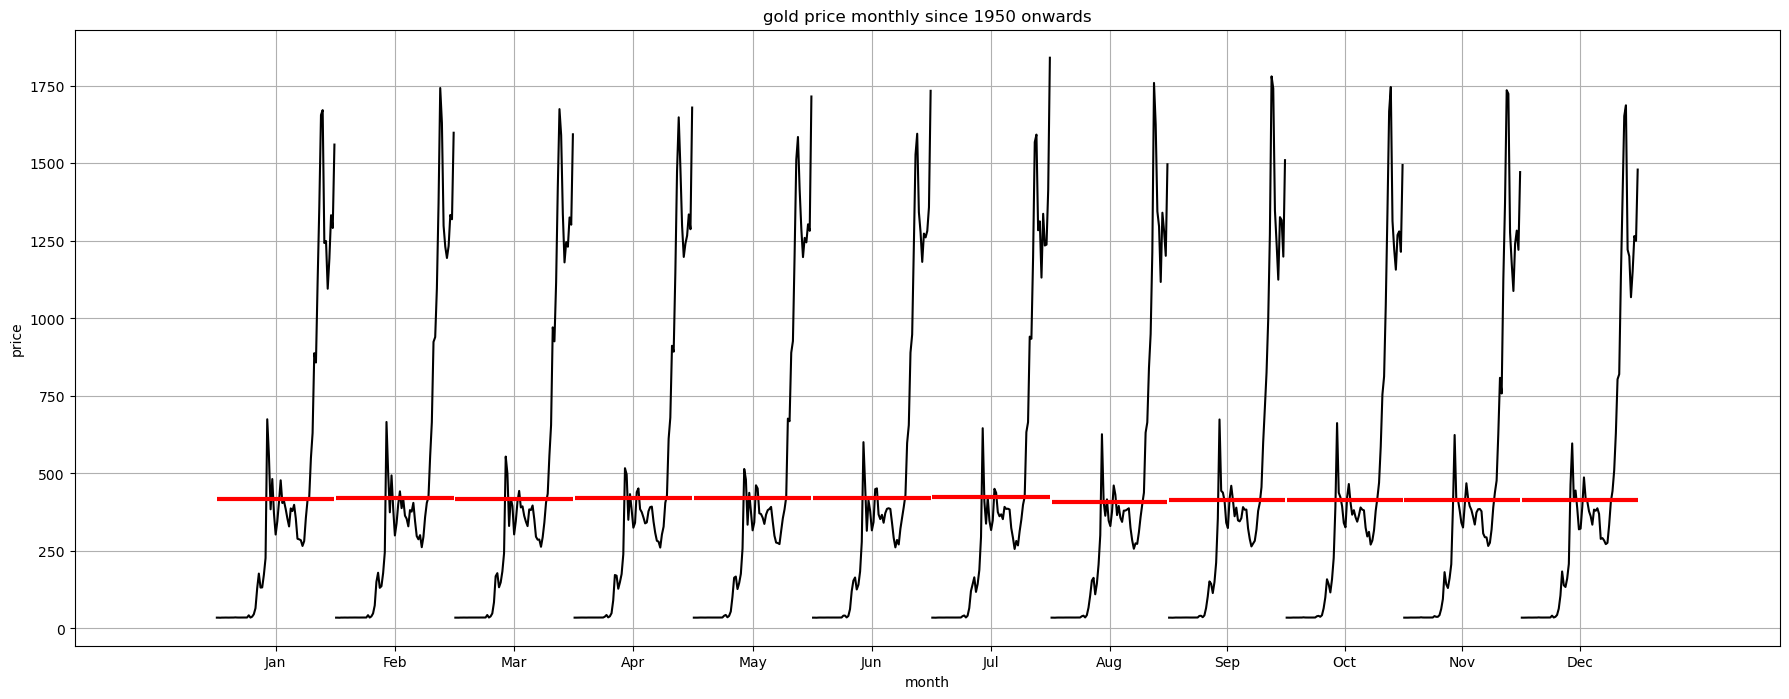

In [19]:
from statsmodels.graphics.tsaplots import month_plot

fig,ax= plt.subplots (figsize=(22,8))
month_plot(df,ylabel= 'gold price ', ax =ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();

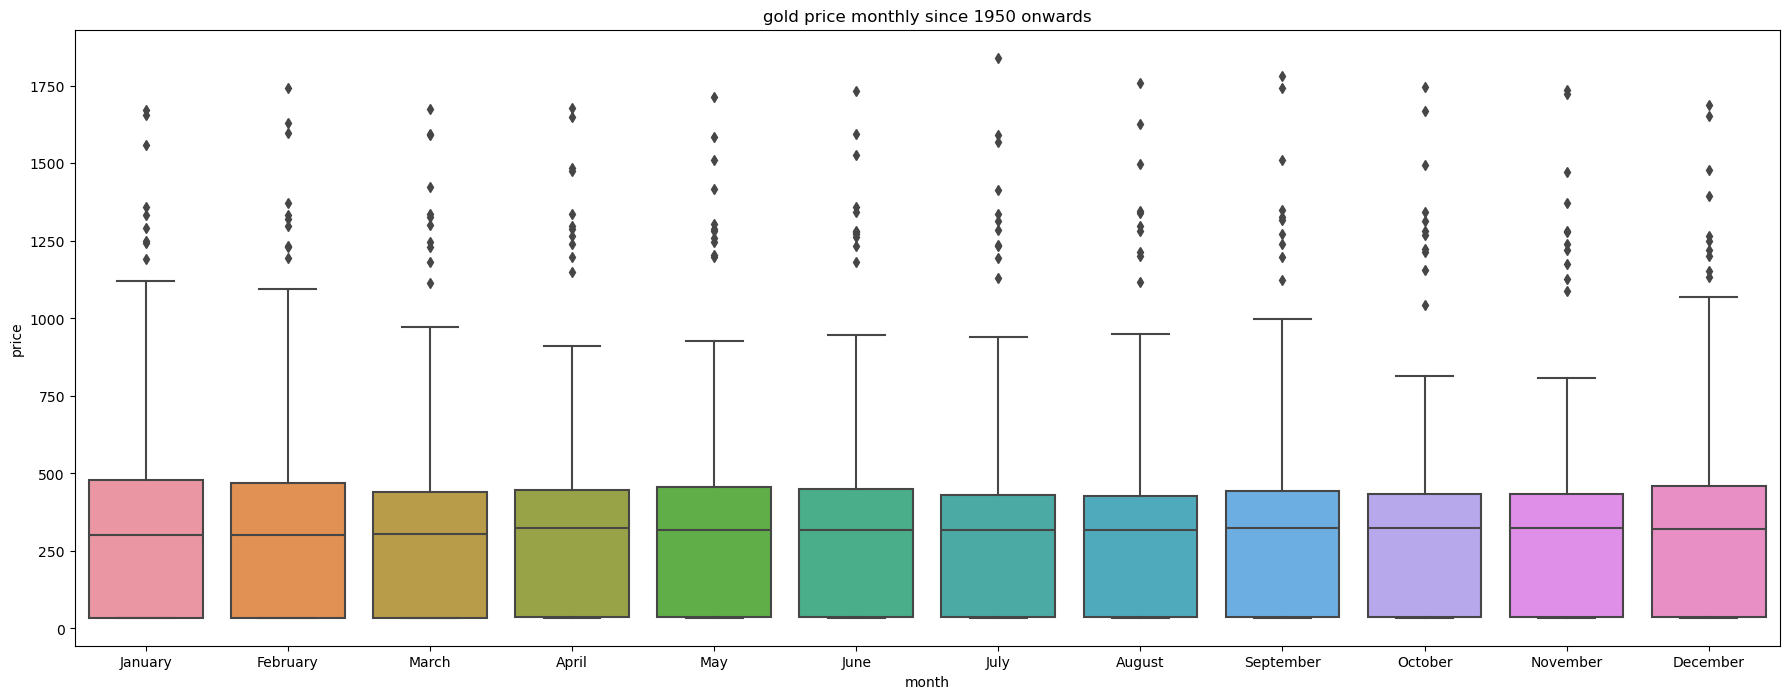

In [20]:
_,ax= plt.subplots(figsize=(22, 8))
sns.boxplot(x =df.index.month_name(), y= df.values[:, 0], ax= ax)
plt.title("gold price monthly since 1950 onwards")
plt.xlabel("month")
plt.ylabel('price')
plt.show();

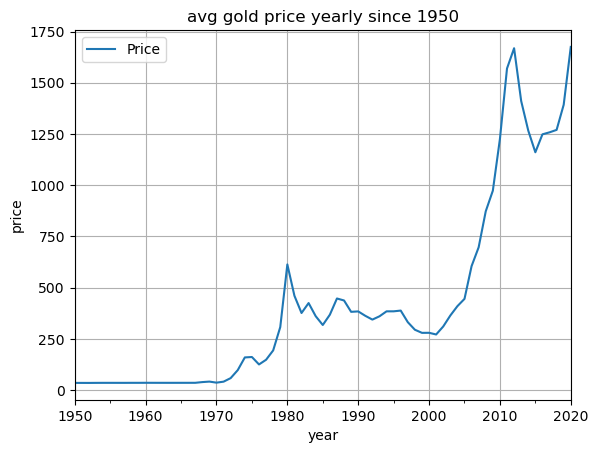

In [21]:
df_yearly_sum= df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('price')
plt.grid();

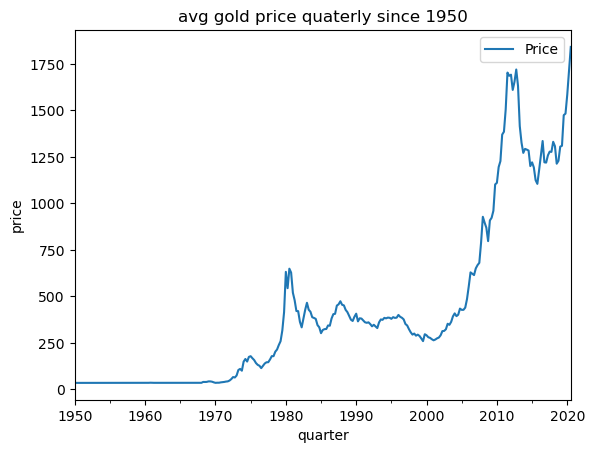

In [22]:
df_quarterly_sum= df.resample('Q').mean()
df_quarterly_sum.plot();
plt.title("avg gold price quaterly since 1950")
plt.xlabel('quarter')
plt.ylabel('price')
plt.show();

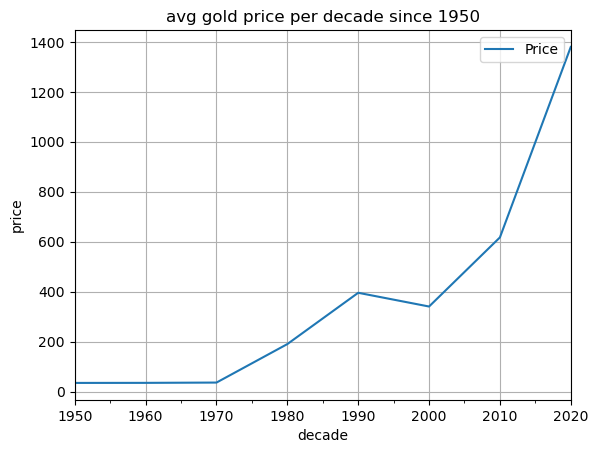

In [23]:
df_decade_sum= df.resample('10Y').mean()
df_decade_sum.plot();
plt.title('avg gold price per decade since 1950')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();

In [24]:
df_1 =df.groupby(df.index.year).mean().rename(columns= {"Price": "Mean"})
df_1= df_1.merge(df.groupby(df.index.year).std().rename(columns={'Price': 'Std'}),left_index =True, right_index= True) 
df_1['Cov_pct']=((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


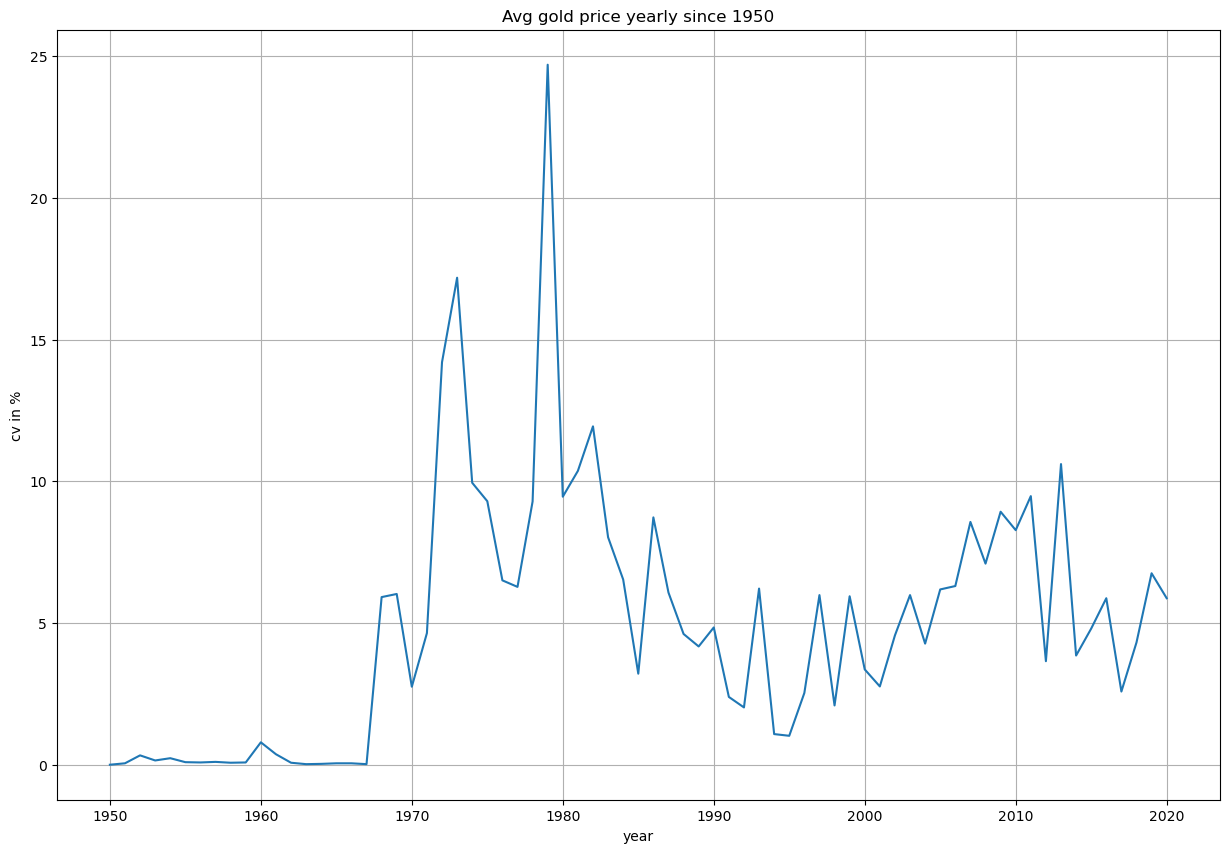

In [25]:
fig, ax= plt.subplots (figsize= (15,10)) 
df_1['Cov_pct'].plot();
plt.title("Avg gold price yearly since 1950")
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid()

In [26]:
train = df[df.index.year <= 2015]
test =df[df.index.year > 2015]

In [27]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


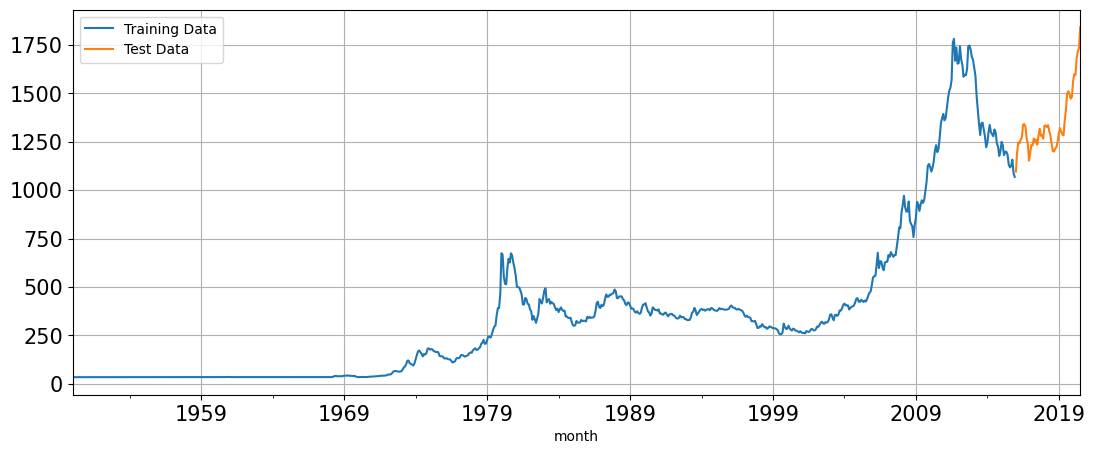

In [28]:
train ["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.show()

In [29]:
train_time = [i+1 for i in range(len(train))] 
test_time = [i+len(train)+1 for i in range(len(test))] 
len(train_time), len(test_time)

(792, 55)

In [30]:
LR_train =train.copy()
LR_test= test.copy()

In [31]:
LR_train['time']= train_time
LR_test['time']= test_time

In [32]:
lr= LinearRegression()
lr.fit(LR_train[['time']], LR_train["Price"].values)

LinearRegression()

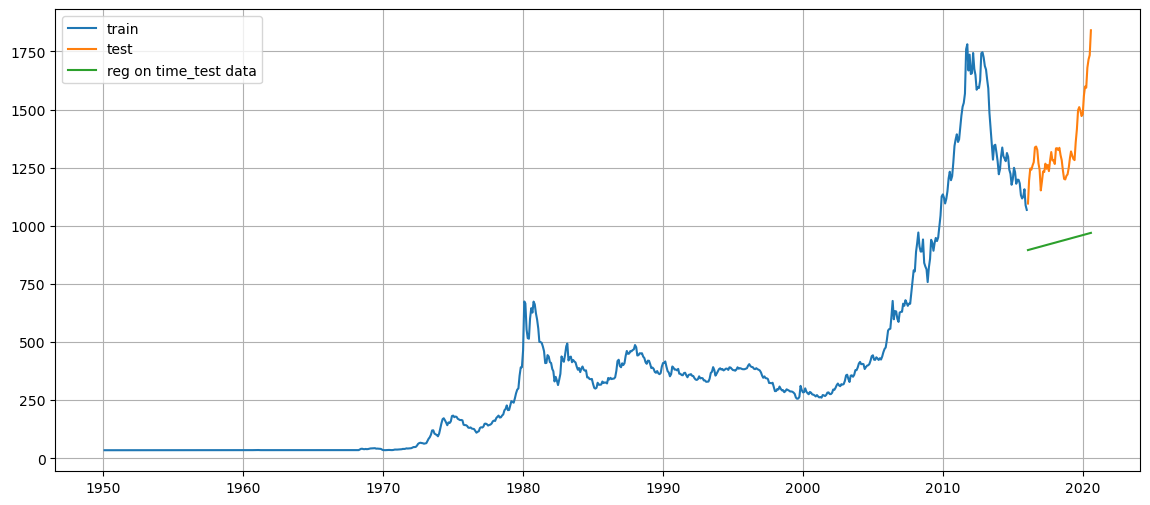

In [33]:
test_predictions_model1 = lr.predict(LR_test[["time"]])
LR_test['forecast'] = test_predictions_model1
plt.figur= plt.figure(figsize =(14, 6))
plt.plot(train ['Price'], label= 'train')
plt.plot(test["Price"], label = 'test') 
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid();

In [34]:
def mape (actual, pred):
    return round((np.mean(abs(actual- pred)/ actual))*100, 2)


In [35]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1) 
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [36]:
results = pd.DataFrame({'Test Mape (%)': [mape_model1_test]}, index=["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [37]:
Naive_train= train.copy()
Naive_test = test.copy()

In [38]:
Naive_test['naive'] = np.asarray(train ['Price']) [len (np.asarray(train ['Price']))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

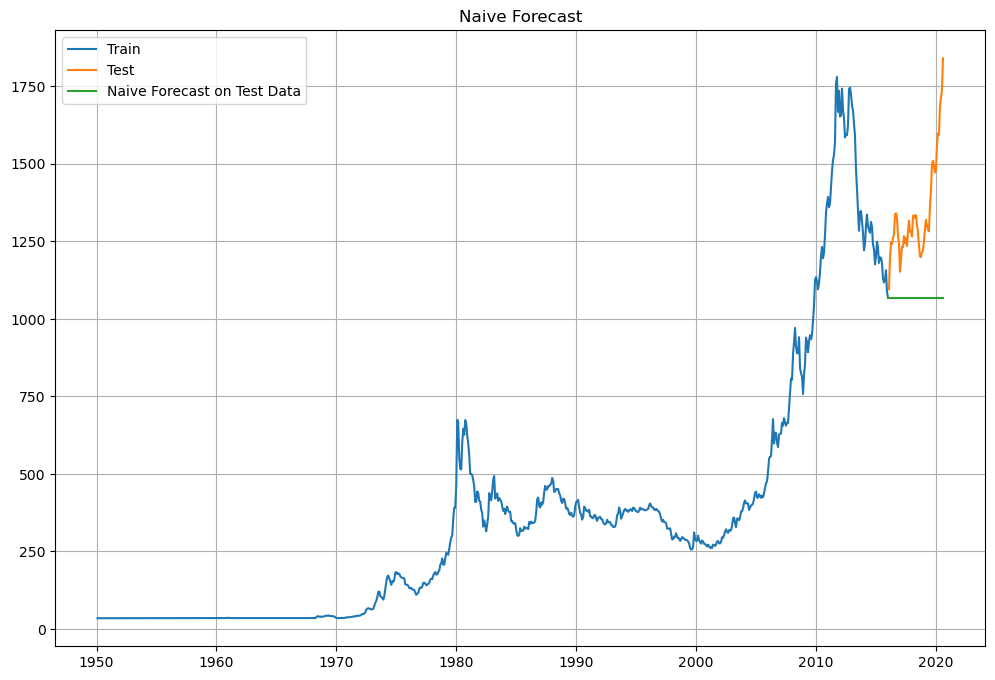

In [39]:
plt.figure(figsize=(12,8))
plt.plot(Naive_train ['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(Naive_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [40]:
final_model =ExponentialSmoothing(df,trend = 'additive',seasonal = 'additive').fit(smoothing_level = 0.4,smoothing_trend = 0.3, smoothing_seasonal = 0.6)

In [41]:
Mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE:", Mape_final_model)

MAPE: 17.24


In [42]:
predictions = final_model.forecast(steps=len(test))

In [43]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid, ddof=1),
                        'prediction': predictions,
                        'upper_CI': predictions+ 1.96*np.std(final_model.resid, ddof =1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.716748,1792.867721,1901.018694
2020-09-30,1615.298179,1723.449152,1831.600125
2020-10-31,1538.554867,1646.705839,1754.856812
2020-11-30,1476.740491,1584.891463,1693.042436
2020-12-31,1459.304892,1567.455865,1675.606837


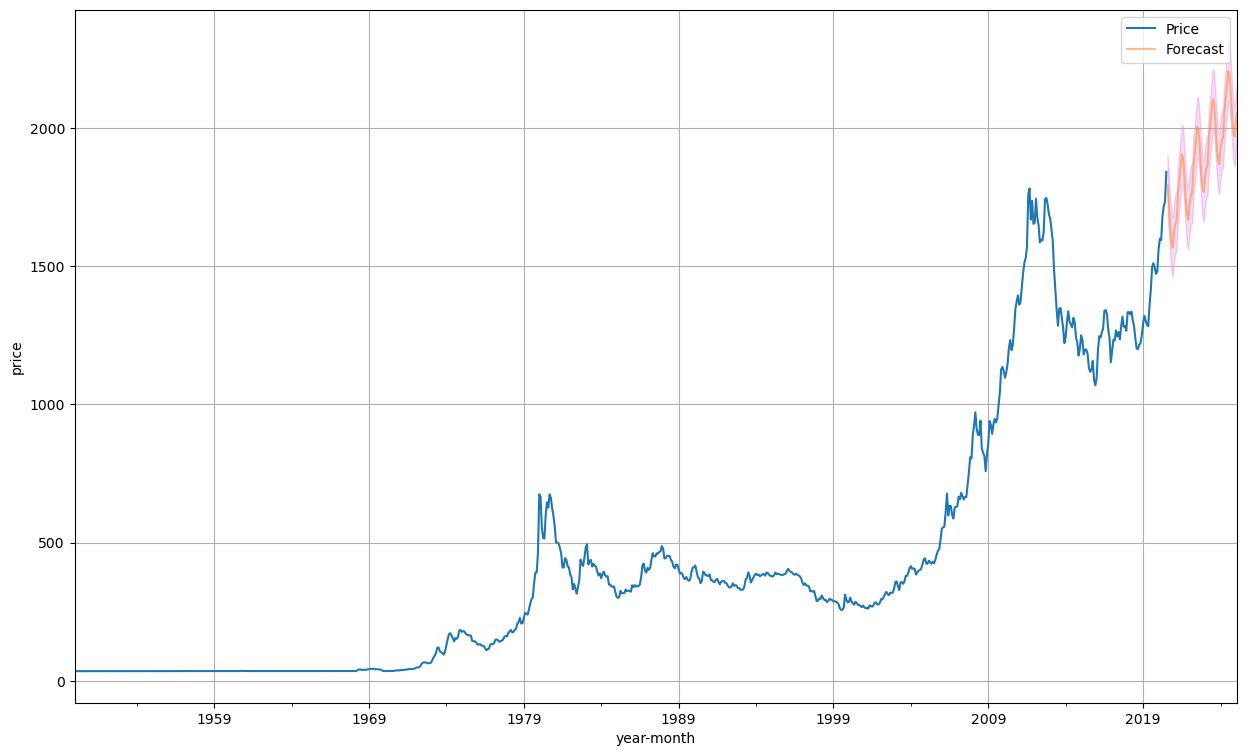

In [44]:
axis =df.plot(label = 'Actual', figsize=(15,9))
pred_df['prediction'].plot(ax= axis, label = 'Forecast', alpha =0.5)
axis.fill_between(pred_df.index, pred_df ['lower_CI'], pred_df ['upper_CI'], color = 'm', alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [45]:
pip install tensorflow --index-url=https://pypi.org/simple/


Looking in indexes: https://pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [46]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import LSTM, Dense

In [50]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)

In [49]:
data = pd.read_csv('gold_monthly_csv.csv')
prices = data['Price'].values.astype('float32').reshape(-1, 1)

In [51]:
train_size = int(len(prices) * 0.67)
test_size = len(prices) - train_size
train, test = prices[0:train_size,:], prices[train_size:len(prices),:]

In [52]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [53]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [54]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [55]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
print("Original shape:", trainX.shape)

trainX = np.reshape(trainX, (563, 3, 1))

print("New shape:", trainX.shape)


model = Sequential()
model.add(LSTM(16, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))  

model.compile(optimizer='adam', loss='mse')


model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Original shape: (563, 3, 1)
New shape: (563, 3, 1)
Epoch 1/100
563/563 - 6s - 11ms/step - loss: 0.0030
Epoch 2/100
563/563 - 2s - 4ms/step - loss: 2.2735e-04
Epoch 3/100
563/563 - 2s - 4ms/step - loss: 2.3274e-04
Epoch 4/100
563/563 - 2s - 3ms/step - loss: 2.2501e-04
Epoch 5/100
563/563 - 2s - 3ms/step - loss: 2.0669e-04
Epoch 6/100
563/563 - 2s - 3ms/step - loss: 1.9270e-04
Epoch 7/100
563/563 - 2s - 3ms/step - loss: 1.9728e-04
Epoch 8/100
563/563 - 2s - 3ms/step - loss: 1.8776e-04
Epoch 9/100
563/563 - 2s - 3ms/step - loss: 1.7921e-04
Epoch 10/100
563/563 - 2s - 3ms/step - loss: 1.8223e-04
Epoch 11/100
563/563 - 2s - 4ms/step - loss: 1.7605e-04
Epoch 12/100
563/563 - 2s - 3ms/step - loss: 1.6124e-04
Epoch 13/100
563/563 - 2s - 4ms/step - loss: 1.5560e-04
Epoch 14/100
563/563 - 2s - 4ms/step - loss: 1.4486e-04
Epoch 15/100
563/563 - 2s - 3ms/step - loss: 1.4368e-04
Epoch 16/100
563/563 - 2s - 4ms/step - loss: 1.4502e-04
Epoch 17/100
563/563 - 2s - 3ms/step - loss: 1.2540e-04
Epoch 18/

In [71]:
model = Sequential()


model.add(Dense(64, input_shape=(trainX.shape[1],)))  
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
indices = np.arange(trainX.shape[0])
batch_size = 32 
for i in range(100):
    np.random.shuffle(indices)  
    model.fit(trainX[indices], trainY[indices], epochs=1, batch_size=batch_size, verbose=2)



18/18 - 3s - 164ms/step - accuracy: 0.0036 - loss: 2.7055e-04
18/18 - 0s - 7ms/step - accuracy: 0.0036 - loss: 1.0038e-04
18/18 - 0s - 7ms/step - accuracy: 0.0036 - loss: 1.0350e-04
18/18 - 0s - 6ms/step - accuracy: 0.0036 - loss: 9.2173e-05
18/18 - 0s - 8ms/step - accuracy: 0.0036 - loss: 1.0574e-04
18/18 - 0s - 6ms/step - accuracy: 0.0036 - loss: 9.4606e-05
18/18 - 0s - 8ms/step - accuracy: 0.0036 - loss: 1.0096e-04
18/18 - 0s - 7ms/step - accuracy: 0.0036 - loss: 8.8195e-05
18/18 - 0s - 7ms/step - accuracy: 0.0036 - loss: 8.5539e-05
18/18 - 0s - 7ms/step - accuracy: 0.0036 - loss: 8.2975e-05
18/18 - 0s - 7ms/step - accuracy: 0.0036 - loss: 1.0553e-04
18/18 - 0s - 7ms/step - accuracy: 0.0036 - loss: 8.8691e-05
18/18 - 0s - 4ms/step - accuracy: 0.0036 - loss: 7.5687e-05
18/18 - 0s - 6ms/step - accuracy: 0.0036 - loss: 7.4157e-05
18/18 - 0s - 5ms/step - accuracy: 0.0036 - loss: 7.5379e-05
18/18 - 0s - 7ms/step - accuracy: 0.0036 - loss: 9.3279e-05
18/18 - 0s - 6ms/step - accuracy: 0.00

In [101]:

model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))


In [102]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [103]:
testX_reshaped = np.reshape(testX, (testX.shape[0], look_back, 1))


In [104]:

trainPredict = model.predict(trainX)
testPredict = model.predict(testX_reshaped)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [110]:
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
              
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
              
trainPredict = model.predict(trainX)
testPredict = model.predict(testX_reshaped)

Epoch 1/100
563/563 - 5s - 10ms/step - loss: 2282462625791395550461952.0000
Epoch 2/100
563/563 - 2s - 3ms/step - loss: 2282463922828088233164800.0000
Epoch 3/100
563/563 - 2s - 3ms/step - loss: 2282463922828088233164800.0000
Epoch 4/100
563/563 - 2s - 3ms/step - loss: 2282464211058464384876544.0000
Epoch 5/100
563/563 - 2s - 3ms/step - loss: 2282462337561019398750208.0000
Epoch 6/100
563/563 - 2s - 4ms/step - loss: 2282462914021771702173696.0000
Epoch 7/100
563/563 - 2s - 3ms/step - loss: 2282463346367335929741312.0000
Epoch 8/100
563/563 - 2s - 3ms/step - loss: 2282463202252147853885440.0000
Epoch 9/100
563/563 - 3s - 5ms/step - loss: 2282463202252147853885440.0000
Epoch 10/100
563/563 - 2s - 3ms/step - loss: 2282462914021771702173696.0000
Epoch 11/100
563/563 - 2s - 3ms/step - loss: 2282462337561019398750208.0000
Epoch 12/100
563/563 - 2s - 4ms/step - loss: 2282463922828088233164800.0000
Epoch 13/100
563/563 - 2s - 3ms/step - loss: 2282464211058464384876544.0000
Epoch 14/100
563/563

In [105]:

trainY_reshaped = trainY.reshape(-1, 1)
testY_reshaped = testY.reshape(-1, 1)


trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY_reshaped)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY_reshaped)



Index(['date', 'price'], dtype='object')


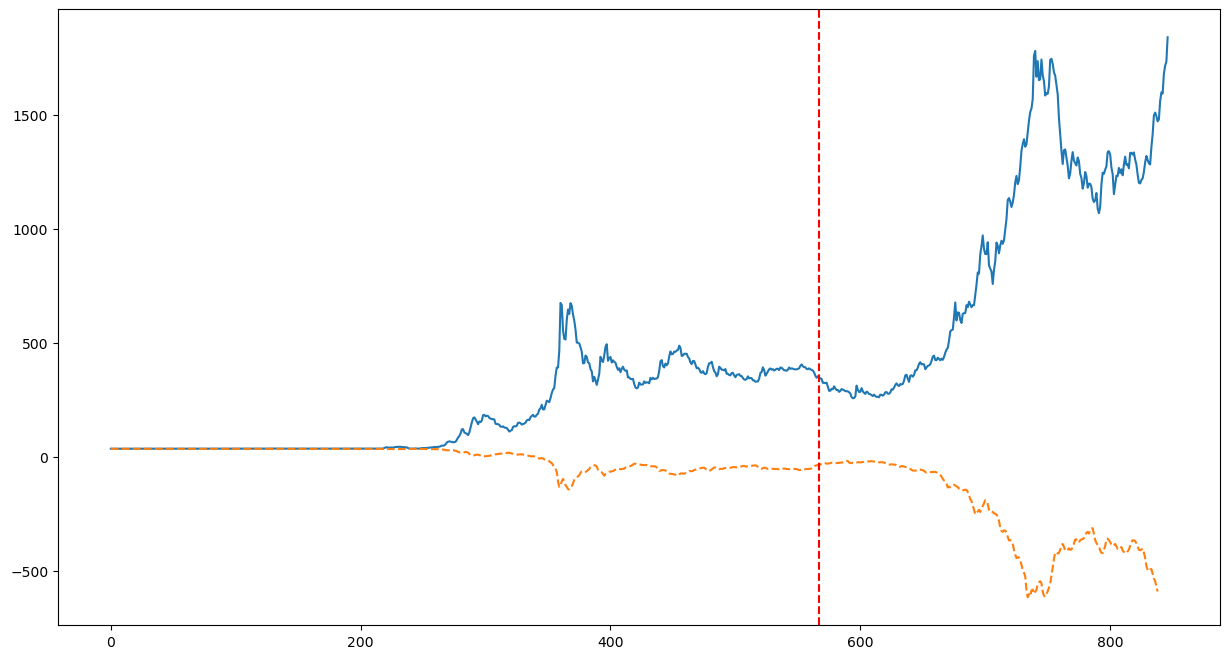

In [109]:
print(data.columns)
data.columns = data.columns.str.strip().str.lower()


plt.figure(figsize=(15, 8))
plt.plot(data['price'].values, label='Actual Gold Prices')  # Use the correct column name
plt.plot(np.concatenate([trainPredict.reshape(-1), testPredict.reshape(-1)]), label='Predictions', linestyle='--')
plt.axvline(x=train_size, color='r', linestyle='--')
